In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from  sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
df_initial=pd.read_excel(r'C:\Users\achauhan\Desktop\Radian\Data\Standard Upload_RedwoodFlow_20180619.xlsx')

In [5]:
df_Grade=df_initial['Final_Overall_Grade']

In [6]:
df_initial.head()

,Loan Number,Loan Status,Sample Group,Seller Loan Number,Borrower 1 Last Name,Borrower 1 First Name,Borrower 2 Last Name,Borrower 2 First Name,Borrower 3 First Name,Borrower 3 Last Name,...,General Comments,Loan Level ATR/QM Status,Initial Overall Grade,Initial Credit Grade,Initial Property Valuation Grade,Initial Compliance Grade,Final_Overall_Grade,Final Credit Grade,Final Property Valuations Grade,Final Compliance Grade
0,406040973,Client Complete,ONSLOW 02.2017,5215013788,ZACHARIAS,TIMOTHY,(No Data),(No Data),(No Data),(No Data),...,QM Safe Harbor Reviewed to Choice QM Guidelin...,QM: Safe Harbor,(No Data),(No Data),(No Data),(No Data),2,2,1,1
1,406061368,Client Complete,SEMT 2017-4 INITIAL,2003323,GLADWIN,DAVID,GLADWIN,JENNIFER,(No Data),(No Data),...,Final CD 04/05/2017\nNote: building plans in ...,QM: Safe Harbor,3D,3C,3D,2,2,1,1,2
2,406062431,Client Complete,SEMT 2017-CH1,4116218430,Lasry,Helena,(No Data),(No Data),(No Data),(No Data),...,Final CD 1/17/17 * QM N/A* Choice QM guideline...,ATR/QM: Not Applicable,3,2,3D,3,1,1,1,1
3,406062432,Client Complete,SEMT 2017-CH1,4116200476,Lasry,Helena,(No Data),(No Data),(No Data),(No Data),...,Final CD 1/18/17\n\nATR/QM: N/A\n\nIncome for ...,ATR/QM: Not Applicable,3,3D,3D,3,1,1,1,1
4,406064286,Client Complete,SEMT 2017-4 INITIAL,30089636,SMITH,Kevin,Hittson,Suzanne,(No Data),(No Data),...,Final CD 02/14/2017\nSelect QM 30 Year FRM gui...,QM: Safe Harbor,(No Data),(No Data),(No Data),(No Data),2,1,1,2


In [7]:
df_final=pd.read_excel(r'C:\Users\achauhan\Desktop\Radian\Data\final_data.xlsx')

In [8]:
df_final.shape

(11110, 37)

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11110 entries, 0 to 12301
Data columns (total 37 columns):
Address City                            11110 non-null object
Address State                           11110 non-null object
Address Zip                             11110 non-null int64
Loan Type                               11110 non-null object
Amortization Type                       11110 non-null object
Original Principal Balance              11110 non-null float64
Note Date                               11110 non-null datetime64[ns]
Combined Loan Amount                    11110 non-null float64
Note Rate                               11110 non-null float64
Note P&I                                11110 non-null float64
Note Term                               11110 non-null int64
Occupancy                               11110 non-null object
Loan Purpose                            11110 non-null object
Property Type                           11110 non-null object
Year Built   

In [10]:
df_final.describe()

,Address Zip,Original Principal Balance,Combined Loan Amount,Note Rate,Note P&I,Note Term,Year Built,LTV,Property Tax Amount,Borrower 1 Years On Job,...,Borrower 1 Equifax Credit Score,Borrower 1 Experian Credit Score,Borrower 1 Transunion Credit Score,Borrower 1 Total Income,Borrower 2 Total Income,Representative Credit Score,Total Monthly Income,Total Remaining Gross Monthly Income,Total Monthly Expenses,Primary Residence Expense
count,11110.000000,1.111000e+04,1.111000e+04,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,...,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000
mean,69868.691899,7.329779e+05,7.367360e+05,4.340889,3689.967062,355.143654,1983.445995,70.433240,958.822671,9.305475,...,767.296850,770.047795,766.505131,20194.497786,3965.376126,763.889739,24519.018194,16991.093563,7527.924632,4835.723677
std,30275.706611,2.659935e+05,2.709309e+05,0.543093,1378.191248,28.555604,34.042817,13.168647,598.312767,8.805416,...,36.402459,36.954334,34.981606,24611.991075,7471.859489,33.266091,24624.460405,21451.589192,4640.776019,2135.277833
min,1262.000000,1.388450e+05,1.388450e+05,2.625000,715.940000,120.000000,1696.000000,11.080000,0.000000,0.000000,...,530.000000,582.000000,576.000000,-11127.910000,-27752.960000,613.000000,-2404.290000,-9041.890000,127.000000,0.000000
25%,45047.000000,5.480000e+05,5.490000e+05,4.000000,2735.220000,360.000000,1963.000000,62.632500,558.052500,2.330000,...,748.000000,749.000000,747.000000,10736.017500,0.000000,744.000000,14359.462500,8961.330000,4939.712500,3573.567500
50%,83535.000000,6.700000e+05,6.750000e+05,4.250000,3358.880000,360.000000,1995.000000,75.000000,837.925000,6.920000,...,777.000000,777.000000,774.000000,15000.140000,0.000000,772.000000,19509.650000,12699.815000,6442.450000,4443.015000
75%,94113.500000,8.473750e+05,8.500000e+05,4.625000,4305.362500,360.000000,2009.000000,80.000000,1208.597500,14.000000,...,795.000000,797.000000,793.000000,22876.645000,6714.417500,789.000000,27177.412500,18537.152500,8762.302500,5642.290000
max,99901.000000,6.451250e+06,6.451250e+06,6.875000,31265.960000,360.000000,2207.000000,95.000000,10338.540000,52.000000,...,831.000000,844.000000,839.000000,966361.000000,192708.640000,839.000000,966361.000000,857896.730000,115192.400000,47533.990000


In [11]:
columns=['Address City','Address State','Address Zip','Loan Type',
         'Amortization Type','Original Principal Balance',
         'Note Date','Combined Loan Amount','Note Rate','Note P&I','Note Term',
         'Occupancy', 'Loan Purpose','Property Type','Year Built','Occupancy Status',
         'LTV', 'Title Status', 'Other Liens', 'Property Tax Amount','Borrower 1 Years On Job',
         'Borrower 1 Years In Field','Borrower 1 Self Employed','Borrower 1 First Time Home Buyer',
         'Borrower 1 Equifax Credit Score', 'Borrower 1 Experian Credit Score',
         'Borrower 1 Transunion Credit Score','Borrower 1 Total Income','Borrower 2 Total Income',
         'Representative Credit Score','Total Monthly Income',
         'Total Remaining Gross Monthly Income', 'Total Monthly Expenses',
         'Primary Residence Expense','Total Assets','Location','Final_Overall_Grades']

In [12]:
for col in columns:
    print(df_final[col].value_counts())

Seattle               307
Los Angeles           160
San Jose              155
Dallas                149
San Francisco         141
Austin                118
Scottsdale            117
San Diego             116
Portland              105
Denver                105
Chicago               104
Houston                85
Atlanta                84
Brooklyn               65
Phoenix                54
Las Vegas              51
Oakland                49
SEATTLE                49
Washington             42
Virginia Beach         40
Bellevue               40
Arlington              39
Kirkland               39
San Antonio            37
Littleton              36
Parker                 33
Frisco                 33
Lafayette              33
Charlotte              32
DALLAS                 32
                     ... 
Kalispell               1
Bay Harbor Islands      1
Apotos                  1
Beaverton               1
PALM HARBOR             1
Ipswich                 1
METAMORA                1
River Falls 

KeyError: 'Final_Overall_Grades'

In [13]:
corr_matrix = df_final.corr()

In [14]:
corr_matrix

,Address Zip,Original Principal Balance,Combined Loan Amount,Note Rate,Note P&I,Note Term,Year Built,LTV,Property Tax Amount,Borrower 1 Years On Job,...,Borrower 1 Equifax Credit Score,Borrower 1 Experian Credit Score,Borrower 1 Transunion Credit Score,Borrower 1 Total Income,Borrower 2 Total Income,Representative Credit Score,Total Monthly Income,Total Remaining Gross Monthly Income,Total Monthly Expenses,Primary Residence Expense
Address Zip,1.000000,0.079387,0.078091,0.064956,0.076747,0.037895,0.033417,-0.076957,0.011436,-0.009329,...,-0.038739,-0.075605,-0.053958,-0.045671,0.014755,-0.067893,-0.039097,-0.039572,-0.024537,0.051404
Original Principal Balance,0.079387,1.000000,0.989894,0.009863,0.957890,0.004574,-0.076746,-0.062570,0.567925,0.059903,...,-0.058565,-0.052110,-0.055390,0.357464,0.100494,-0.057790,0.394472,0.335050,0.544368,0.781964
Combined Loan Amount,0.078091,0.989894,1.000000,0.005951,0.947522,0.003833,-0.077458,-0.082930,0.568272,0.061469,...,-0.057959,-0.051717,-0.054215,0.355870,0.100598,-0.056964,0.392794,0.333045,0.544738,0.788640
Note Rate,0.064956,0.009863,0.005951,1.000000,0.146456,0.164523,0.028104,0.344233,-0.100755,0.002844,...,-0.385458,-0.366691,-0.378534,-0.002392,0.009936,-0.419887,0.002317,-0.014928,0.081296,0.047967
Note P&I,0.076747,0.957890,0.947522,0.146456,1.000000,-0.187169,-0.068288,-0.020259,0.536495,0.065877,...,-0.113149,-0.099504,-0.108749,0.356460,0.112093,-0.115656,0.397032,0.334922,0.558545,0.790626
Note Term,0.037895,0.004574,0.003833,0.164523,-0.187169,1.000000,-0.008423,0.090037,-0.045304,-0.050432,...,-0.033517,-0.050104,-0.040244,-0.088301,-0.048325,-0.046782,-0.102038,-0.096521,-0.095261,-0.127892
Year Built,0.033417,-0.076746,-0.077458,0.028104,-0.068288,-0.008423,1.000000,0.129369,0.011905,0.021169,...,-0.008263,0.002546,-0.014260,0.047811,-0.034800,-0.003454,0.034548,0.033677,0.027648,-0.021945
LTV,-0.076957,-0.062570,-0.082930,0.344233,-0.020259,0.090037,0.129369,1.000000,-0.245816,-0.133627,...,-0.058816,-0.055152,-0.084945,-0.065173,-0.017969,-0.066282,-0.073401,-0.076489,-0.035909,-0.086362
Property Tax Amount,0.011436,0.567925,0.568272,-0.100755,0.536495,-0.045304,0.011905,-0.245816,1.000000,0.050247,...,-0.003552,0.016918,0.007022,0.292909,0.077076,0.004238,0.320146,0.274612,0.429361,0.650156
Borrower 1 Years On Job,-0.009329,0.059903,0.061469,0.002844,0.065877,-0.050432,0.021169,-0.133627,0.050247,1.000000,...,-0.022089,-0.021431,-0.006919,0.118775,-0.054475,-0.014233,0.106837,0.095342,0.126178,0.045836


In [15]:
df_final['Final_Overall_Grade'].describe()

count     11110
unique        5
top           1
freq       5118
Name: Final_Overall_Grade, dtype: int64

In [16]:
df_final['Final_Overall_Grade'].value_counts()

1     5118
2     4460
3D    1160
3      331
3C      41
Name: Final_Overall_Grade, dtype: int64

In [17]:
df_final.groupby('Final_Overall_Grade').mean()

,Address Zip,Original Principal Balance,Combined Loan Amount,Note Rate,Note P&I,Note Term,Year Built,LTV,Property Tax Amount,Borrower 1 Years On Job,...,Borrower 1 Equifax Credit Score,Borrower 1 Experian Credit Score,Borrower 1 Transunion Credit Score,Borrower 1 Total Income,Borrower 2 Total Income,Representative Credit Score,Total Monthly Income,Total Remaining Gross Monthly Income,Total Monthly Expenses,Primary Residence Expense
Final_Overall_Grade,,,,,,,,,,,,,,,,,,,,,
1,68281.782728,709467.587534,712065.467874,4.352646,3577.997386,356.037124,1983.992771,71.310879,915.537839,9.154416,...,769.604728,772.861469,768.744822,19371.844033,3905.399174,766.606096,23503.345963,16293.339814,7210.006149,4666.833462
2,69990.568386,740444.457188,744632.059796,4.395087,3743.561585,356.391928,1983.501794,70.284637,984.153043,9.317466,...,765.797758,768.091704,764.744843,20548.890022,4048.987256,761.800897,25007.474202,17286.597379,7720.876823,4926.371641
3,71100.036254,773100.024169,779233.525378,4.493746,3897.235076,357.099698,1981.981873,70.962810,968.361541,8.462175,...,757.827795,760.761329,758.166163,17888.754653,3492.322628,754.812689,22139.547553,14196.112749,7943.434804,5043.780816
3C,62234.341463,708089.219512,708089.219512,4.664634,3738.929024,355.609756,1979.365854,71.627317,954.156829,9.435366,...,767.707317,776.390244,769.951220,28290.630244,3746.329268,764.365854,32265.202927,22901.179268,9364.023659,5118.809024
3D,76320.127586,797430.799138,804110.696129,4.025572,3917.049888,345.827586,1981.381034,66.939078,1049.850474,10.161897,...,765.565517,767.580172,765.649138,22833.301302,4051.253741,762.509483,27527.387069,19522.112353,8005.274716,5162.979526


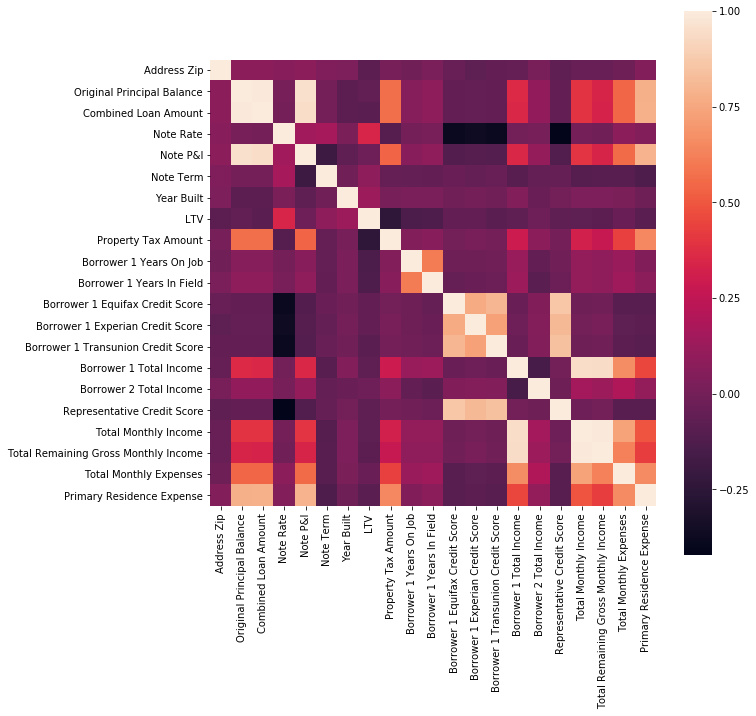

In [18]:
corrmat = df_final.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, square=True);

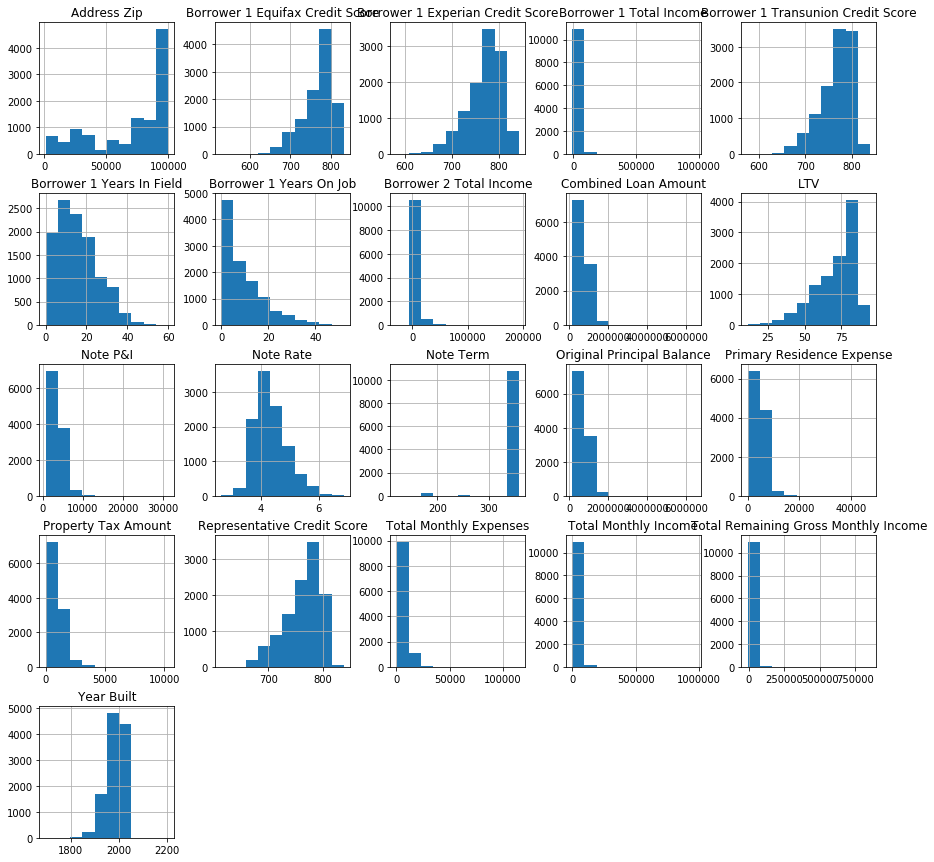

In [19]:
df_final.select_dtypes(include=['int64']).columns
df_final.hist(figsize=(15,15))
plt.show()

In [20]:
#cat_cols=

In [21]:
label_encoder = preprocessing.LabelEncoder()

#data.Final_Overall_Grade.value_counts()

In [116]:
cat_col = ['Address State','Address Zip','Loan Type',
         'Amortization Type','Original Principal Balance',
         'Occupancy', 'Loan Purpose','Property Type','Occupancy Status',
         'Other Liens', 'Borrower 1 Years On Job',
         'Location']
for c in cat_col:
    df_final[c] = label_encoder.fit_transform(df_final[c])

In [117]:
df_final

,Address City,Address State,Address Zip,Loan Type,Amortization Type,Original Principal Balance,Note Date,Combined Loan Amount,Note Rate,Note P&I,...,Borrower 1 Total Income,Borrower 2 Total Income,Representative Credit Score,Total Monthly Income,Total Remaining Gross Monthly Income,Total Monthly Expenses,Primary Residence Expense,Total Assets,Location,Final_Overall_Grade
0,CLARKLAKE,22,1286,0,1,3344,2017-01-20,1265000.0,4.875,6694.48,...,30457.46,0.00,709,35450.08,23633.32,11816.76,9054.76,496713,2,2
1,ROGERS,23,1405,0,1,2451,2017-04-06,815750.0,4.000,3894.52,...,20308.57,3863.61,803,24172.18,16225.19,7946.99,5297.33,476099,1,2
2,Brooklyn,34,339,0,1,2380,2017-01-19,800000.0,5.375,4479.77,...,12807.25,0.00,769,12807.25,7411.64,5395.61,0.00,60883.8,3,1
3,Brooklyn,34,339,0,1,2380,2017-01-19,800000.0,5.375,4479.77,...,12807.25,0.00,769,12807.25,7411.64,5395.61,0.00,60883.8,3,1
4,Rockwall,43,1720,0,1,1634,2017-02-14,650000.0,4.500,3293.45,...,10500.00,9629.62,705,20129.62,12352.53,7777.09,5007.09,558574,2,2
5,Meridian,13,2095,0,1,1376,2016-12-27,608400.0,4.875,3219.70,...,28638.10,0.00,688,28638.10,22834.45,5803.65,4134.65,263722,2,2
6,Durango,5,2066,0,1,476,2016-12-15,494000.0,4.000,2358.43,...,6855.50,0.00,789,6855.50,4139.59,2715.91,2663.91,26946.4,2,2
7,Lancaster,45,608,0,1,522,2017-01-17,537422.0,3.875,2346.02,...,1943.92,6083.31,797,8027.23,4660.44,3366.79,3250.79,72386.4,1,2
8,Dallas,43,1739,0,1,804,2016-12-24,532000.0,4.500,2695.57,...,28003.30,0.00,750,28003.30,21737.08,6266.22,4034.00,31215.9,2,2
9,CLYDE HILL,47,3119,0,0,3358,2016-12-17,1275000.0,3.000,5375.45,...,15570.08,20481.21,759,36051.29,23094.97,12956.32,7352.08,464007,2,3


In [24]:
'''logreg = LogisticRegression()
for i in range(1,37) :
    rfe = RFE(logreg, i)
    rfe = rfe.fit(df_final[columns], df_final[target])
    filtered = df_final[columns][df_final[columns].columns[rfe.support_]].columns
    X_train, X_test, y_train, y_test = train_test_split(df_final[filtered], df_final[target], test_size=0.3, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_train)
    print('Accuracy of logistic regression classifier on train set: '+ str(i) +': {:.2f}'.format(logreg.score(X_train, y_train)))
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set:'+ str(i) +' {:.2f}'.format(logreg.score(X_test, y_test)))'''

"logreg = LogisticRegression()\nfor i in range(1,37) :\n    rfe = RFE(logreg, i)\n    rfe = rfe.fit(df_final[columns], df_final[target])\n    filtered = df_final[columns][df_final[columns].columns[rfe.support_]].columns\n    X_train, X_test, y_train, y_test = train_test_split(df_final[filtered], df_final[target], test_size=0.3, random_state=0)\n    logreg = LogisticRegression()\n    logreg.fit(X_train, y_train)\n    y_pred = logreg.predict(X_train)\n    print('Accuracy of logistic regression classifier on train set: '+ str(i) +': {:.2f}'.format(logreg.score(X_train, y_train)))\n    y_pred = logreg.predict(X_test)\n    print('Accuracy of logistic regression classifier on test set:'+ str(i) +' {:.2f}'.format(logreg.score(X_test, y_test)))"

In [101]:
features=df_final.drop(['Final_Overall_Grade','Address City','Total Assets','Title Status','Borrower 1 Self Employed','Note Date','Borrower 1 First Time Home Buyer'],axis=1)

In [102]:
features.head()

,Address State,Address Zip,Loan Type,Amortization Type,Original Principal Balance,Combined Loan Amount,Note Rate,Note P&I,Note Term,Occupancy,...,Borrower 1 Experian Credit Score,Borrower 1 Transunion Credit Score,Borrower 1 Total Income,Borrower 2 Total Income,Representative Credit Score,Total Monthly Income,Total Remaining Gross Monthly Income,Total Monthly Expenses,Primary Residence Expense,Location
0,22,1286,0,1,3344,1265000.0,4.875,6694.48,360,1,...,696,723,30457.46,0.00,709,35450.08,23633.32,11816.76,9054.76,2
1,23,1405,0,1,2451,815750.0,4.000,3894.52,360,1,...,811,804,20308.57,3863.61,803,24172.18,16225.19,7946.99,5297.33,1
2,34,339,0,1,2380,800000.0,5.375,4479.77,360,0,...,769,776,12807.25,0.00,769,12807.25,7411.64,5395.61,0.00,3
3,34,339,0,1,2380,800000.0,5.375,4479.77,360,0,...,769,776,12807.25,0.00,769,12807.25,7411.64,5395.61,0.00,3
4,43,1720,0,1,1634,650000.0,4.500,3293.45,360,1,...,689,740,10500.00,9629.62,705,20129.62,12352.53,7777.09,5007.09,2


In [118]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()

In [119]:
target1=df_final['Final_Overall_Grade']
target=number.fit_transform(target1.astype('str'))
X_train, X_val, y_train, y_val = train_test_split(features, target, train_size=0.8)

In [121]:
X_train.head()

,Address State,Address Zip,Loan Type,Amortization Type,Original Principal Balance,Combined Loan Amount,Note Rate,Note P&I,Note Term,Occupancy,...,Borrower 1 Experian Credit Score,Borrower 1 Transunion Credit Score,Borrower 1 Total Income,Borrower 2 Total Income,Representative Credit Score,Total Monthly Income,Total Remaining Gross Monthly Income,Total Monthly Expenses,Primary Residence Expense,Location
3882,4,2764,0,1,2582,852000.0,3.875,4006.42,360,1,...,781,758,16743.03,8825.96,774,25568.99,15252.04,10316.95,5238.95,2
7799,9,1019,0,1,2380,800000.0,3.875,3761.90,360,1,...,804,797,12916.67,0.00,798,12916.67,7391.85,5524.82,5499.82,2
9337,19,5,0,1,362,480000.0,4.125,2326.32,360,1,...,776,786,12515.34,8834.80,758,21350.14,12337.23,9012.91,3493.91,2
1663,10,823,0,1,587,507128.0,4.125,2457.79,360,1,...,751,774,9517.08,9656.00,774,19173.08,12384.00,6789.08,3329.08,2
8402,4,2474,0,1,3389,1320000.0,4.250,6493.61,360,1,...,780,703,23393.39,0.00,768,23393.39,14603.00,8790.39,8347.55,2


In [122]:
X_val.head()

,Address State,Address Zip,Loan Type,Amortization Type,Original Principal Balance,Combined Loan Amount,Note Rate,Note P&I,Note Term,Occupancy,...,Borrower 1 Experian Credit Score,Borrower 1 Transunion Credit Score,Borrower 1 Total Income,Borrower 2 Total Income,Representative Credit Score,Total Monthly Income,Total Remaining Gross Monthly Income,Total Monthly Expenses,Primary Residence Expense,Location
3402,3,2205,0,1,308,473600.0,4.000,2261.04,360,1,...,780,776,11501.59,0.0,769,11501.59,7088.46,4413.13,2653.13,2
6673,4,2989,0,1,2261,769500.0,4.125,3729.38,360,1,...,717,707,19391.00,0.0,707,19391.00,13403.04,5987.96,5030.96,2
10346,45,588,0,1,2122,741600.0,5.000,3981.07,360,1,...,804,800,16885.00,0.0,796,16885.00,11602.54,5282.46,4751.46,2
1684,4,2876,0,0,2879,955000.0,4.250,4698.03,360,1,...,763,775,15384.62,0.0,772,15384.62,8961.78,6422.84,6125.84,2
8044,4,2798,0,0,2672,880000.0,3.625,4013.25,360,1,...,788,794,30869.87,0.0,788,30869.87,24595.79,6274.08,5284.08,2


In [5]:
#y_train.head()

In [111]:
#y_val.head()
df_final['Final_Overall_Grade'].value_counts()

1     5118
2     4460
3D    1160
3      331
3C      41
Name: Final_Overall_Grade, dtype: int64

In [126]:
#Let's apply machine learning algorithm to predict the target label

def GradientBoostingClassifier_random_forest_model(X_train, X_val, y_train, y_val):
    if __name__ == '__main__':
        
        rf = RandomForestClassifier(criterion='gini',
                                n_estimators=500,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

        
        param_grid = {"min_samples_split" : [6,7,8],
             "n_estimators" : [500,700,1000]}

        estimator = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

        
        estimator.fit(X_train, y_train)
        predict=estimator.predict_proba(X_val)

        best_params = estimator.best_params_
                                 
        validation_accuracy = log_loss(y_val, predict)
        print('Validation accuracy: ', validation_accuracy)
        print(best_params)

In [127]:
GradientBoostingClassifier_random_forest_model(X_train, X_val, y_train, y_val)

Validation accuracy:  0.8984720679654269
{'min_samples_split': 6, 'n_estimators': 700}


In [129]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_val)

In [131]:
def model_for_submission(features, target, test):
    if __name__ == '__main__':
        
        lr = LogisticRegression()

        
        param_grid = {'C':[0.1]}

        estimator = GridSearchCV(estimator=lr,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

        estimator.fit(features, target)  
        
        predictions = estimator.predict_proba(test)
        #predictions=predictions.astype(float)
        
        extracting_proability=predictions[:,1]
        
        data = {'': test_id, 'Made Donation in March 2007': extracting_proability}

        submit = pd.DataFrame(data=data) 
    
        submit.to_csv('Submission_file.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

In [132]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.472


In [91]:
#features.loc[features['Title Status']== 'No']

In [45]:
#features.loc[features['Address State'].isin('No')]

In [67]:
features['Title Status'].value_counts()

Present    11108
Missing        2
Name: Title Status, dtype: int64

In [87]:
 writer = features.to_excel(r'C:\Users\achauhan\Desktop\Radian\Data\output.xlsx')

In [90]:
features.to_excel(r'C:\Users\achauhan\Desktop\Radian\Data\output1.xlsx')

In [134]:
'''from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_val)
print(confusion_matrix)'''

'from sklearn.metrics import confusion_matrix\nconfusion_matrix = confusion_matrix(y_train, y_val)\nprint(confusion_matrix)'

In [137]:
'''from sklearn.metrics import classification_report
print(classification_report(y_train, y_val))'''

'from sklearn.metrics import classification_report\nprint(classification_report(y_train, y_val))'

In [138]:
from sklearn.svm import LinearSVC

#X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[ 1.43420519e-05 -5.35203772e-05  0.00000000e+00  1.32019922e-06
  -6.32046016e-06  2.19379885e-06  2.77849444e-07  3.32560957e-05
   2.41492255e-05  4.08937947e-07  6.74147146e-07  1.26769116e-08
   1.56351926e-05  2.78211183e-07  1.08699002e-05 -5.55108732e-08
  -5.37965121e-05 -1.67786711e-05 -5.62723050e-06  3.77042389e-05
   4.78712359e-05  4.32947745e-05  2.37457648e-05  2.25025822e-05
   4.60039655e-05 -1.85468159e-05 -2.46981921e-06 -1.60769967e-05
  -5.35555766e-06  4.40446767e-08]
 [-6.81025407e-06 -1.16570550e-05  0.00000000e+00  9.56265816e-07
   1.96930842e-05 -1.78707323e-06  5.87764124e-07  3.40680985e-05
   1.30302873e-05 -6.89167360e-08 -7.99505602e-07  4.75008717e-09
  -5.04358407e-05 -3.62768474e-07 -4.41492745e-06  2.24285711e-08
   3.24347668e-05 -4.87224504e-06  1.75672577e-07 -4.08937999e-05
  -4.91957200e-05 -4.71764279e-05  6.29658375e-06  6.85845431e-06
  -4.97422838e-05 -2.81614753e-06 -1.05410987e-05  7.72495120e-06
   1.59400620e-05 -2.42694

In [160]:
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of RBF-kernel SVC on training set: 0.40
Accuracy of RBF-kernel SVC on test set: 0.41


In [161]:
clf = LinearSVC(C=100, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[ 1.43420519e-05 -5.35203772e-05  0.00000000e+00  1.32019922e-06
  -6.32046018e-06  2.19379885e-06  2.77849444e-07  3.32560957e-05
   2.41492255e-05  4.08937947e-07  6.74147146e-07  1.26769116e-08
   1.56351926e-05  2.78211183e-07  1.08699002e-05 -5.55108733e-08
  -5.37965121e-05 -1.67786711e-05 -5.62723050e-06  3.77042389e-05
   4.78712358e-05  4.32947745e-05  2.37457648e-05  2.25025822e-05
   4.60039655e-05 -1.85468159e-05 -2.46981921e-06 -1.60769967e-05
  -5.35555766e-06  4.40446767e-08]
 [-6.81025407e-06 -1.16570550e-05  0.00000000e+00  9.56265817e-07
   1.96930842e-05 -1.78707323e-06  5.87764124e-07  3.40680985e-05
   1.30302873e-05 -6.89167360e-08 -7.99505602e-07  4.75008712e-09
  -5.04358407e-05 -3.62768474e-07 -4.41492745e-06  2.24285711e-08
   3.24347668e-05 -4.87224504e-06  1.75672577e-07 -4.08937999e-05
  -4.91957200e-05 -4.71764279e-05  6.29658376e-06  6.85845432e-06
  -4.97422838e-05 -2.81614753e-06 -1.05410987e-05  7.72495120e-06
   1.59400620e-05 -2.42694

In [162]:
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of RBF-kernel SVC on training set: 0.47
Accuracy of RBF-kernel SVC on test set: 0.44


In [163]:
clf = LinearSVC(C=1000, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[ 1.43420519e-05 -5.35203772e-05  0.00000000e+00  1.32019922e-06
  -6.32046018e-06  2.19379885e-06  2.77849444e-07  3.32560957e-05
   2.41492255e-05  4.08937947e-07  6.74147146e-07  1.26769116e-08
   1.56351926e-05  2.78211183e-07  1.08699002e-05 -5.55108733e-08
  -5.37965121e-05 -1.67786711e-05 -5.62723050e-06  3.77042389e-05
   4.78712358e-05  4.32947745e-05  2.37457648e-05  2.25025822e-05
   4.60039655e-05 -1.85468159e-05 -2.46981921e-06 -1.60769967e-05
  -5.35555766e-06  4.40446767e-08]
 [-6.81025407e-06 -1.16570550e-05  0.00000000e+00  9.56265817e-07
   1.96930842e-05 -1.78707323e-06  5.87764124e-07  3.40680985e-05
   1.30302873e-05 -6.89167360e-08 -7.99505602e-07  4.75008712e-09
  -5.04358407e-05 -3.62768474e-07 -4.41492745e-06  2.24285711e-08
   3.24347668e-05 -4.87224504e-06  1.75672577e-07 -4.08937999e-05
  -4.91957200e-05 -4.71764279e-05  6.29658376e-06  6.85845432e-06
  -4.97422838e-05 -2.81614753e-06 -1.05410987e-05  7.72495120e-06
   1.59400620e-05 -2.42694

In [164]:
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of RBF-kernel SVC on training set: 0.47
Accuracy of RBF-kernel SVC on test set: 0.44


In [140]:
'''from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

#X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')'''

"from sklearn.svm import SVC\nfrom adspy_shared_utilities import plot_class_regions_for_classifier\n\n#X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)\n\n# The default SVC kernel is radial basis function (RBF)\nplot_class_regions_for_classifier(SVC().fit(X_train, y_train),\n                                 X_train, y_train, None, None,\n                                 'Support Vector Classifier: RBF kernel')\n\n# Compare decision boundries with polynomial kernel, degree = 3\nplot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)\n                                 .fit(X_train, y_train), X_train,\n                                 y_train, None, None,\n                                 'Support Vector Classifier: Polynomial kernel, degree = 3')"

In [144]:
from sklearn.svm import SVC

clf = SVC(C=100).fit(X_train, y_train)


In [145]:
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.44


In [146]:
from sklearn.svm import SVC
clf = SVC(C=1000).fit(X_train, y_train)

In [148]:
print('Before normalized with MinMax scaling')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Before normalized with MinMax scaling
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.44


In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

In [151]:
clf = SVC(C=10).fit(X_train_scaled, y_train)

In [152]:
print('After normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_val)))

After normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.54
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.54


In [153]:
clf = SVC(C=100).fit(X_train_scaled, y_train)

In [154]:
print('After normalized with MinMax scaling with c=100)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_val)))

After normalized with MinMax scaling with c=100)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.56
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.55


In [155]:
clf = SVC(C=1000).fit(X_train_scaled, y_train)

In [156]:
print('After normalized with MinMax scaling with c=1000)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_val)))

After normalized with MinMax scaling with c=1000)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.58
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.55


In [157]:
clf = SVC(C=10000).fit(X_train_scaled, y_train)

In [158]:
print('After normalized with MinMax scaling with c=10000)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_val)))

After normalized with MinMax scaling with c=10000)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.61
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.55


In [167]:
'''from sklearn.model_selection import cross_val_score

clf = SVC(C=100).fit(X_train, y_train)
X = X_train.as_matrix()
y = y_train.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))'''

"from sklearn.model_selection import cross_val_score\n\nclf = SVC(C=100).fit(X_train, y_train)\nX = X_train.as_matrix()\ny = y_train.as_matrix()\ncv_scores = cross_val_score(clf, X, y)\n\nprint('Cross-validation scores (3-fold):', cv_scores)\nprint('Mean cross-validation score (3-fold): {:.3f}'\n     .format(np.mean(cv_scores)))"

In [169]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [170]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.47


In [171]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_val, y_val)))

Accuracy of Decision Tree classifier on training set: 0.53
Accuracy of Decision Tree classifier on test set: 0.52


In [174]:
clf3 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)


In [175]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_val, y_val)))

Accuracy of Decision Tree classifier on training set: 0.53
Accuracy of Decision Tree classifier on test set: 0.52


In [187]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10,
                            random_state = 15).fit(X_train, y_train)

In [188]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on training set: 0.55
Accuracy of Decision Tree classifier on test set: 0.53


In [190]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [191]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
for name, score in zip(X_train, rnd_clf.feature_importances_):
    print(name, score)

Address State 0.02466721362671717
Address Zip 0.049412472928979274
Loan Type 0.0
Amortization Type 0.08764758446696168
Original Principal Balance 0.039433017810617886
Combined Loan Amount 0.03993779041331671
Note Rate 0.044410300760882176
Note P&I 0.04423505566701425
Note Term 0.004853974162683183
Occupancy 0.0042536653704138205
Loan Purpose 0.01275138299146329
Property Type 0.013323875625891912
Year Built 0.04052377689667552
Occupancy Status 0.0073826055717469375
LTV 0.03449713200102198
Other Liens 0.001512336793068103
Property Tax Amount 0.046203664296829726
Borrower 1 Years On Job 0.04344887182783485
Borrower 1 Years In Field 0.038786961212732604
Borrower 1 Equifax Credit Score 0.04209900938812718
Borrower 1 Experian Credit Score 0.04316305674248917
Borrower 1 Transunion Credit Score 0.04170995793953123
Borrower 1 Total Income 0.044148774685262356
Borrower 2 Total Income 0.024928468319177367
Representative Credit Score 0.04148516788272563
Total Monthly Income 0.04126047115795139
Tot

In [192]:
type(score)

numpy.float64

In [193]:
features_imp1=features.drop(['Note Term','Loan Type','Location','Address State','Occupancy','Loan Purpose' 
,'Property Type','Occupancy Status','Other Liens','Borrower 2 Total Income'],axis=1)

In [214]:
features_imp1.to_excel(r'C:\Users\achauhan\Desktop\Radian\Data\New folder2\out.xlsx')

In [195]:
target1=df_final['Final_Overall_Grade']
target=number.fit_transform(target1.astype('str'))
X_train1, X_val1, y_train1, y_val1 = train_test_split(features, target, train_size=0.8)

In [215]:
target_numpy = pd.DataFrame(target)
target_numpy.to_excel(r'C:\Users\achauhan\Desktop\Radian\Data\New folder2\out1.xlsx')

In [196]:
clf = SVC(C=1000).fit(X_train1, y_train1)

In [197]:
print('Before normalized with MinMax scaling')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train1, y_train1)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_val1, y_val1)))

Before normalized with MinMax scaling
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.46


In [199]:
scaler = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_val1)

In [202]:
clf = SVC(C=10).fit(X_train_scaled1, y_train1)

In [203]:
print('After normalized with MinMax scaling')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled1, y_train1)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled1, y_val1)))

After normalized with MinMax scaling
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.55
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.54


In [204]:
clf = SVC(C=100).fit(X_train_scaled1, y_train1)

In [205]:
print('After normalized with MinMax scaling')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled1, y_train1)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled1, y_val1)))

After normalized with MinMax scaling
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.57
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.53


In [206]:
f = SVC(C=1000).fit(X_train_scaled1, y_train1)

In [207]:
print('After normalized with MinMax scaling')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled1, y_train1)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled1, y_val1)))

After normalized with MinMax scaling
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.57
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.53


In [208]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10,
                            random_state = 15).fit(X_train1, y_train1)

In [209]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train1, y_train1)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_val1, y_val1)))

Accuracy of Decision Tree classifier on training set: 0.55
Accuracy of Decision Tree classifier on test set: 0.53


In [216]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train1, y_train1)
y_pred_rf = rnd_clf.predict(X_val)

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard'
)
voting_clf.fit(X_train1, y_train1)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [218]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.4752475247524752
RandomForestClassifier 0.4990999099909991
SVC 0.454995499549955
VotingClassifier 0.4675967596759676


C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
